<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/data_processing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# A fundamental package for linear algebra and multidimensional arrays
import pandas as pd                  

# Data analysis and data manipulating tool
import numpy as np                   

# Library to generate random numbers
import random                        

# Collection is a Python module that implements specialized container datatypes providing 
# Counter is a dict subclass for counting hashable objects
from collections import Counter      
                                     
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# to display up to 500 rows in the output of the jupyter notebook cell
pd.set_option('display.max_rows', 500)

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train["Sex"].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [22]:
del train['PassengerId']

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [24]:
train.shape
train = train[train['Fare'] != 0]
train.shape

(891, 9)

(876, 9)

In [25]:

# Importing SimpleImputer from sklearn - this will be used to impute data in the cells with missing values

from sklearn.impute import SimpleImputer 

# missing values - numeric - impute with mean in column age
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

# alternative method - missing values - categorical - impute with mode (constant)
const_imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value = 'NA')
const_imputer = const_imputer.fit(train[['Embarked']])
train['Embarked'] = const_imputer.transform(train[['Embarked']]).ravel()

# Export the data to csv file and manually check in Excel how the values have been imputed
# Do this for intuituively understanding how the Imputer works
# You can replace the above strategy with median to check how the results differ
train.to_csv('train_imputed.csv')

# in case you are interested in diving deeper into Mean vs Median method for imputation read the below article
# https://medium.com/analytics-vidhya/feature-engineering-part-1-mean-median-imputation-761043b95379

In [28]:
# Determine outlier using the Standard deviation method for Age column

# calcuate the mean of age
age_mean = train['Age'].mean()
# calculate the standard deviation
age_std = train['Age'].std()
# Lower limit threshold is Mean - 3* SD
ll = age_mean - (3 * age_std)
# Higher limit threshold is Mean + 3* SD
hh = age_mean + (3 * age_std)

print(age_mean)
print(age_std)
print(ll)
print(hh)
# filter the rows where Age is an outlier. i.e. Age less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
filt_outliers_train = train[(train['Age'] < ll) | (train['Age'] > hh)]
filt_outliers_train.head()

29.645219236209233
13.077539516985102
-9.587399314746076
68.87783778716454


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
96,0,1,male,71.0,0,0,34.6542,A5,C
116,0,3,male,70.5,0,0,7.7500,NaN,Q
493,0,1,male,71.0,0,0,49.5042,NaN,C
630,1,1,male,80.0,0,0,30.0000,A23,S
672,0,2,male,70.0,0,0,10.5000,NaN,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
7,0,3,male,2.00,3,1,21.0750,NaN,S
11,1,1,female,58.00,0,0,26.5500,C103,S
15,1,2,female,55.00,0,0,16.0000,NaN,S
16,0,3,male,2.00,4,1,29.1250,NaN,Q
33,0,2,male,66.00,0,0,10.5000,NaN,S
54,0,1,male,65.00,0,1,61.9792,B30,C
78,1,2,male,0.83,0,2,29.0000,NaN,S
94,0,3,male,59.00,0,0,7.2500,NaN,S
96,0,1,male,71.00,0,0,34.6542,A5,C
116,0,3,male,70.50,0,0,7.7500,NaN,Q


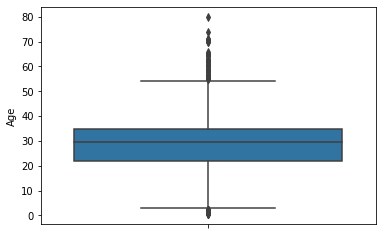

In [29]:
# IQR method for outlier Age
# Calculate Q1, Q2 and IQR
q1 = train['Age'].quantile(0.25)                 
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier_age_train = train[(train['Age'] < q1 - whisker_width*iqr) | (train['Age'] > q3 + whisker_width*iqr)]
outlier_age_train

# boxplot with 1.5 whiskers
sns.boxplot(y='Age', data = train, whis=1.5)

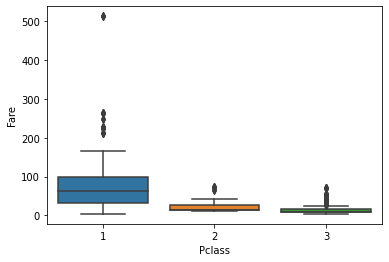

In [31]:
# multivariate outlier - fare and class in comparison
sns.boxplot(x='Pclass', y='Fare', data = train, whis=1.5)

(116, 9)

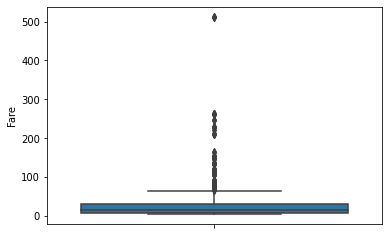

In [33]:

# IQR method for outlier fare
# Calculate Q1, Q2 and IQR
q1 = train['Fare'].quantile(0.25)                 
q3 = train['Fare'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - whisker_width*iqr
upper_whisker = q3 + whisker_width*iqr
# Apply filter with respect to IQR, including optional whiskers
outlier_fare_train = train[(train['Fare'] < q1 - whisker_width*iqr) | (train['Fare'] > q3 + whisker_width*iqr)]
outlier_fare_train.shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Fare', data = train, whis=1.5)

In [35]:

# Outlier treatment
# Top coding - ceiling the uppper limit of the column with the outer whisker value
train.loc[train.Fare>upper_whisker,'Fare'] = upper_whisker

# Bottom / Zero coding - ceiling the lower limit of the column with lower whisker or zero
# It is called Bottom coding when you ceil the lowest value to lower whisker
# It is called zero coding when you ceil the lowest value to zero
# Zero coding should be used for variables which cannot take neagtive values - example, Age cannot be negative

train.loc[train.Fare<0,'Fare'] = 0

# display of minimum and maximum after outlier treatment
print(train['Fare'].min())
train['Fare'].max()

4.0125


66.3

In [36]:
# Another method for outlier treatment is Binning
# Group the values into certain bins -> e.g Age 0 to 10 in a bin called '0 - 10', etc

# Equal width binning -> width = (max value — min value) / N
age_range = train.Age.max() - train.Age.min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))
 
# let's round the bin width
# N = number of bins (which is 10 in the below code)
# change the value 10 in the below code to see how the grouping differs
inter_value = int(np.round(age_range/10))
 
min_value, max_value, inter_value

(0, 80, 8)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
['Bin_1', 'Bin_2', 'Bin_3', 'Bin_4', 'Bin_5', 'Bin_6', 'Bin_7', 'Bin_8', 'Bin_9', 'Bin_10']


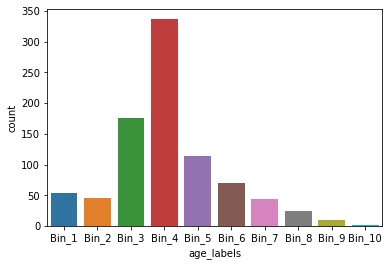

In [37]:

# calculate the intervals
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
print(intervals)
print(labels)

train['age_labels'] = pd.cut(x = train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x = train.Age, bins=intervals, include_lowest=True)

# display the bins in graph along with frequency of occurence 
sns.countplot(train.age_labels)

In [38]:
# importing the fraud dataset
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [39]:
# take a look at the data
fraud_data.shape
fraud_data.head()

(59054, 434)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,...,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,debit,181.0,87.0,483.0,NaN,gmail.com,NaN,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,credit,284.0,60.0,NaN,NaN,hotmail.com,hotmail.com,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.0,35.0,54.0,35.0,54.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,credit,441.0,87.0,NaN,371.0,anonymous.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,183599.0,NaN,NaN,6.0,-11.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,352.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,debit,264.0,87.0,10.0,NaN,yahoo.com,NaN,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.0,15.0,405.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    57049
1     2005
Name: isFraud, dtype: int64

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

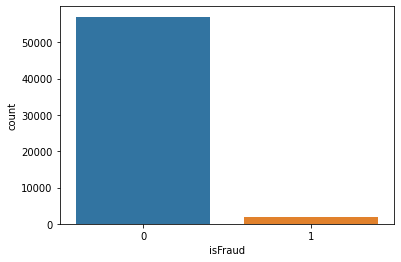

In [40]:
# isFraud = 0 --> normal transaction
# isFraud = 1 --> fraudulent transaction
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100

# visualize the target variable column
sns.countplot(fraud_data.isFraud)

# interpreting the results - 3.40% of transactions are fraudulent and 99.60% of transactions are normal

In [41]:

# Missing values - To get percentage of missing data in each column
fraud_data.isnull().sum() / len(fraud_data) * 100   

# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns 
# filling missing values of numerical columns with mean value
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.549429
card3              0.267552
card4              0.274325
card5              0.751854
card6              0.269245
addr1             11.392962
addr2             11.392962
dist1             59.865547
dist2             93.443289
P_emaildomain     15.934568
R_emaildomain     76.572290
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.204897
D2                47.336336
D3                44.391574
D4                28.526433
D5                52

In [42]:
# earlier we have collected all the categorical columns in cat_cols
fraud_data.shape
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

(59054, 434)

(59054, 1667)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,115.655837,215.529442,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,7.791666,0.791666,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,483.000000,215.529442,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.000000,1.000000,4.000000,4.000000,70.105107,41.39397,145.864171,0.552242,4.000000,4.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,115.655837,215.529442,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.000000,35.000000,54.000000,35.000000,54.000000,35.00000,145.864171,0.552242,0.000000,147.2328,54.000000,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,115.655837,371.000000,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,145.864171,0.552242,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,10.000000,215.529442,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.000000,15.000000,405.000000,32.000000,70.105107,41.39397,145.864171,0.552242,71.000000,405.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
Y = fraud_data.isFraud

In [44]:

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,2.190310e-16,-0.099186,-0.092969,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.652719e+00,2.094196e+00,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,2.190310e-16,-0.099186,-0.071893,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.052023,-0.085706,-0.052858,-0.075654,-0.044784,-0.222665,-0.149534,-0.198351,-1.039716,-5.836866e-01,-0.842241,-0.625664,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-7.035279e-01,-1.064971,-3.458197e-16,0.0,-1.612884e-16,-8.579195e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,2.190310e-16,-0.099186,-0.078918,-0.034155,-0.041973,-0.214317,-0.113785,-0.026137,-0.052023,-0.266499,-0.052858,-0.087120,-0.019564,-0.230715,-0.149534,-0.255488,-0.892057,1.455011e-01,-0.532577,-0.116237,-3.184610e-01,-2.512549e-01,-1.020618e-15,-1.553743e-14,-7.269267e-01,0.000000,-4.659874e-04,0.0,-1.612884e-16,-5.897637e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,1.198129e+00,-0.099186,-0.092969,-0.034155,-0.041973,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,5.41004

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [46]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [47]:

# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)

In [48]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [49]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

1    39942
0    39942
Name: isFraud, dtype: int64

In [50]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27)

In [52]:

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

In [53]:

# let's check the classes counts
downsampled.isFraud.value_counts()

1    1395
0    1395
Name: isFraud, dtype: int64

In [54]:

# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

In [55]:
# fit the sampling
X_train, Y_train = sm.fit_sample(X_train, Y_train)

In [60]:
X_train

array([[3.14558600e+06, 3.33154700e+06, 1.07950000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.55252400e+06, 1.49996310e+07, 5.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48049400e+06, 1.28712540e+07, 3.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.16437561e+06, 3.86773011e+06, 5.13337388e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.24801481e+06, 6.27641072e+06, 3.97008967e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.18560794e+06, 4.48982509e+06, 2.19575861e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])